In [1]:
import sqlite3 as sql
import pandas as pd
conn = sql.connect('database.sqlite')
conn

In [2]:
pd.read_sql_query('select * from salaries', conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,9999999.00,567595.43,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
2,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
3,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
4,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189082.74,,316285.74,316285.74,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148649,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [3]:
def sql_query(T):
    return pd.read_sql_query(T,conn)

Top 10 highest paid employees (by TotalPayBenefits)

In [4]:
T = '''select employeename 'Employees' , totalpaybenefits from salaries 
    order by totalpaybenefits desc limit 10'''

sql_query(T)

,Employees,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,David Shinn,510732.68
2,Amy P Hart,479652.21
3,William J Coaker Jr.,436224.36
4,Gregory P Suhr,425815.28
5,Joanne M Hayes-White,422353.40
6,Gregory P Suhr,418019.22
7,Joanne M Hayes-White,417435.10
8,Ellen G Moffatt,415767.94
9,Gary Altenberg,407274.78


Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'

In [5]:
T = '''select employeename, year from salaries
    where employeename = 'Not Provided'
    or
    employeename = 'Not provided'
'''
sql_query(T)

,EmployeeName,Year
0,Not Provided,2011
1,Not Provided,2012
2,Not provided,2014
3,Not provided,2014
4,Not provided,2014
5,Not provided,2014


Number of unique agencies

In [6]:
T = 'select distinct agency from salaries'

sql_query(T)

,Agency
0,San Francisco


Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [7]:
T = '''select AVG(BasePay) Avg_BasePay, AVG(OvertimePay) Avg_OvertimePay, AVG(TotalPay) Avg_TotalPay
     from salaries where Year = 2011'''

sql_query(T)

,Avg_BasePay,Avg_OvertimePay,Avg_TotalPay
0,63593.401894,4524.411277,71992.050063


Plot the top 10 job titles with the highest TotalPay in 2014.


<Axes: xlabel='JobTitle'>

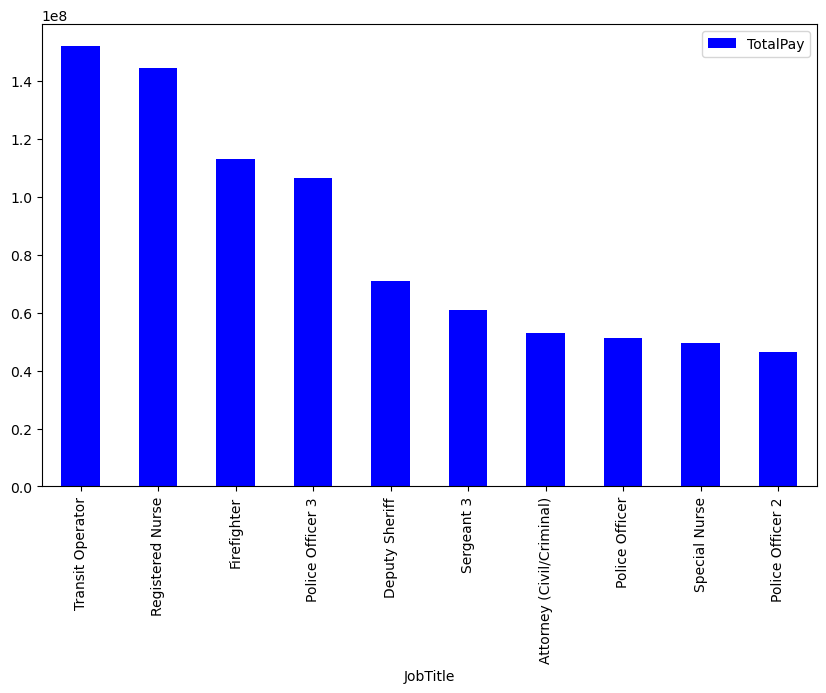

In [8]:
T = '''select JobTitle , sum(TotalPay) 'TotalPay' from salaries
    where year = 2014
    group by JobTitle
    order by TotalPay desc limit 10'''

x = sql_query(T)
x.plot(kind='bar', x='JobTitle', y='TotalPay', color='blue', figsize=(10,6))

Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [9]:
T = '''Select distinct JobTitle from salaries
    Where overtimePay > 150000
    and JobTitle != 'Not provided' '''

sql_query(T)



,JobTitle
0,"Lieutenant, Fire Suppression"
1,EMT/Paramedic/Firefighter
2,Firefighter
3,Deputy Sheriff


Find all employees whose job titles contain the word “CHIEF”

In [10]:
T = ''' Select employeename 'Employees' , jobtitle from salaries
    where JobTitle LIKE '%CHIEF%';
'''

sql_query(T)

,Employees,JobTitle
0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...
622,Sharon C Jackson,Chief Deputy Adlt Probation Of
623,Anita S Lee,Chief Clerk
624,George D Vaughan,Chief Nursery Specialist
625,Patrick W Gillespie,Chief Preparator


Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [11]:
T = '''select Year, count(*) as Engineer_Count from salaries
    where JobTitle like '%ENGINEER%'
    and
    Year in (2012, 2013)
    group by Year'''

sql_query(T)

,Year,Engineer_Count
0,2012,1022
1,2013,1054


In [12]:
T = '''select Year, count(*) as Fire_Count from salaries
    where JobTitle like '%Fire%'
    and 
    Year in (2012, 2013)
    group by Year'''

sql_query(T)

,Year,Fire_Count
0,2012,1449
1,2013,1460


Distinct job titles starting with "CAPTAIN"


In [13]:
T = '''select distinct jobtitle from salaries
    where jobtitle like 'CAPTAIN%' '''

sql_query(T)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [14]:
T = '''select basepay , totalpay from salaries 
    where basepay > 50000
    and 
    totalpay < 150000
    and
    basepay not in ("Not provided" , "Not Provided")
    and 
    totalpay not in ("Not provided" , "Not Provided")
'''
    
sql_query(T)

,BasePay,TotalPay
0,112380.37,149987.24
1,149975.8,149975.80
2,119703.78,149970.85
3,105934.65,149964.61
4,106065.2,149952.47
...,...,...
87255,52428.53,53458.31
87256,52389.79,52555.44
87257,51668.7,51785.23
87258,51673.98,51673.98
